In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split



In [2]:
plloan_data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
plloan_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg",
                        "Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [3]:
plloan_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Cleaning and EDA

In [4]:
plloan_data.isnull().sum()


ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [5]:
plloan_data.duplicated().sum()

0

In [6]:
plloan_data.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [7]:
plloan_data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


/Users/lipikapatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


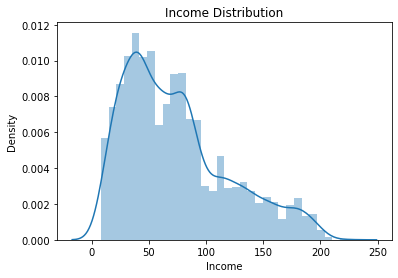

In [8]:
sns.distplot(plloan_data['Income'])
plt.title('Income Distribution');
## Agv Income is 73

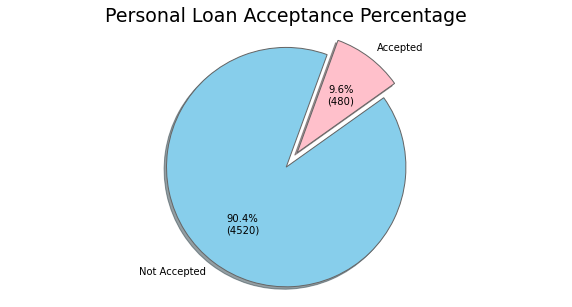

In [26]:
loan_acceptance_count = pd.DataFrame(plloan_data['PersonalLoan'].value_counts()).reset_index()
loan_acceptance_count.columns = ['Labels', 'PersonalLoan']
loan_acceptance_count

# Creating dataset 
pie_labels = loan_acceptance_count['Labels']
pie_labels = ['Not Accepted' if x == 0 else 'Accepted' for x in pie_labels]
  
pie_data = loan_acceptance_count['PersonalLoan'] 

# Creating explode data 
explode = (0, 0.15) 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : '#666666' }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(np.round(pct / 100.*np.sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 5))

ax.pie(pie_data,  
       autopct = lambda pct: func(pct, pie_data), 
       explode = explode,  
       labels = pie_labels, 
       shadow = True, 
       startangle = 70, 
       wedgeprops = wp,
       colors = ['skyblue','pink'])

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Personal Loan Acceptance Percentage', size=19)
plt.show();

### Check Linearly Seperable

In [49]:
age_0 = plloan_data[plloan_data['PersonalLoan']==0]['Age']
age_1 = plloan_data[plloan_data['PersonalLoan']==1]['Age']

exp_0 = plloan_data[plloan_data['PersonalLoan']==0]['Income']
exp_1 = plloan_data[plloan_data['PersonalLoan']==1]['Income']


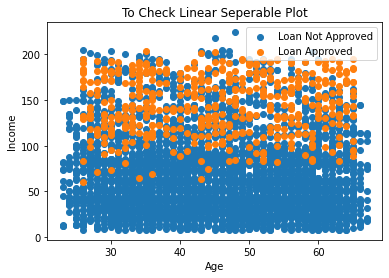

In [50]:
import matplotlib.pyplot as plt
plt.scatter(age_0, exp_0, label='Loan Not Approved')
plt.scatter(age_1, exp_1, label='Loan Approved')
plt.legend()
plt.title('To Check Linear Seperable Plot')
plt.xlabel("Age")
plt.ylabel("Income")

plt.show()

In [51]:
CDAccount_0 = plloan_data[plloan_data['PersonalLoan']==0]['CDAccount']
CDAccount_1 = plloan_data[plloan_data['PersonalLoan']==1]['CDAccount']

CCAvg_0 = plloan_data[plloan_data['PersonalLoan']==0]['CCAvg']
CCAvg_1 = plloan_data[plloan_data['PersonalLoan']==1]['CCAvg']



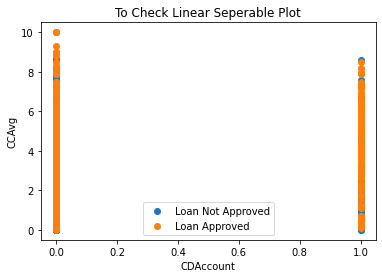

In [52]:
import matplotlib.pyplot as plt
plt.scatter(CDAccount_0, CCAvg_0, label='Loan Not Approved')
plt.scatter(CDAccount_1, CCAvg_1, label='Loan Approved')
plt.legend()
plt.title('To Check Linear Seperable Plot')
plt.xlabel("CDAccount")
plt.ylabel("CCAvg")
plt.show()

### Feature Importance

ID                  -0.024801
Age                 -0.007726
Experience          -0.007413
Income               0.502462
ZIPCode              0.000107
Family               0.061367
CCAvg                0.366891
Education            0.136722
Mortgage             0.142095
PersonalLoan         1.000000
SecuritiesAccount    0.021954
CDAccount            0.316355
Online               0.006278
CreditCard           0.002802
Name: PersonalLoan, dtype: float64


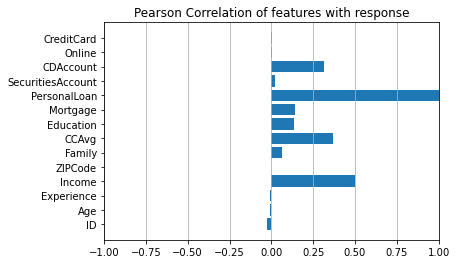

<Figure size 432x288 with 0 Axes>

In [12]:
print(plloan_data.corr()['PersonalLoan'])
plt.barh(np.arange(len(plloan_data.corr()['PersonalLoan'])), 
         plloan_data.corr()['PersonalLoan'],align = 'center',tick_label = plloan_data.columns)
plt.xlim((-1,1))
plt.grid(axis='x')
plt.title('Pearson Correlation of features with response')
plt.show()

plt.clf()

### Data cleaning for negative experience

In [13]:
# There are 52 records with negative experience. 
plloan_data[plloan_data['Experience'] < 0]['Experience'].count()

52

In [14]:
df_positive_experience = plloan_data[plloan_data['Experience'] > 0]
df_negative_experience = plloan_data[plloan_data['Experience'] < 0]
negative_experience_id_list = df_negative_experience['ID'].tolist()

for id in negative_experience_id_list:
    age = plloan_data.loc[np.where(plloan_data['ID']==id)]['Age'].tolist()[0]
    education = plloan_data.loc[np.where(plloan_data['ID']==id)]['Education'].tolist()[0]
    positive_experience_filtered = df_positive_experience[(df_positive_experience['Age'] == age) &
                                                         (df_positive_experience['Education'] == education)]
    if positive_experience_filtered.empty:
        negative_experience_filtered = df_negative_experience[(df_negative_experience['Age'] == age) &
                                                         (df_negative_experience['Education'] == education)]
        experience = round(negative_experience_filtered['Experience'].median())
    else:
        experience = round(positive_experience_filtered['Experience'].median())
    plloan_data.loc[plloan_data.ID == id, 'Experience'] = abs(experience)

In [15]:
# checking if there are records with negative experience
plloan_data[plloan_data['Experience'] < 0]['Experience'].count()

0

In [16]:
plloan_data.drop(['ID', 'ZIPCode'], axis=1, inplace=True)

### SVM Model

In [17]:
# Divide the data as train and test dataset

x = plloan_data.drop(['PersonalLoan'], axis=1)
y = plloan_data['PersonalLoan']

In [18]:
#x=plloan_data.iloc[:,[1,3,4,5,6,7,8,10,11,12,13]].values
#y=plloan_data.iloc[:,9].values

### Split data into training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1142
           1       0.50      0.02      0.04       108

    accuracy                           0.91      1250
   macro avg       0.71      0.51      0.50      1250
weighted avg       0.88      0.91      0.88      1250

[[1140    2]
 [ 106    2]]


<AxesSubplot:>

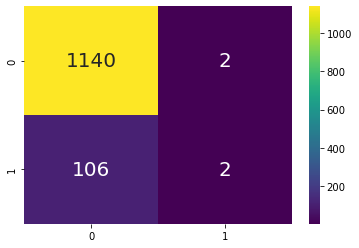

In [27]:
#modelling SVM
from sklearn import svm
classifier=svm.SVC(kernel='rbf',gamma='auto',C=1)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
print(c)
Accuracy=sum(np.diag(c))/(np.sum(c))
Accuracy

## Heat Map to depict the Confusion Matrix
sns.heatmap(c,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})



              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1142
           1       0.89      0.58      0.70       108

    accuracy                           0.96      1250
   macro avg       0.92      0.79      0.84      1250
weighted avg       0.96      0.96      0.95      1250

[[1134    8]
 [  45   63]]


<AxesSubplot:>

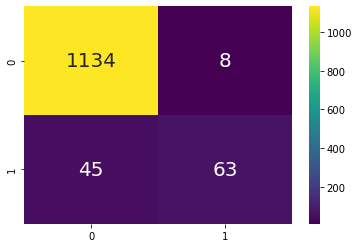

In [28]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=1)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

#Evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

#Accuracy of our model.
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
print(c)
Accuracy=sum(np.diag(c))/(np.sum(c))
Accuracy

## Heat Map to depict the Confusion Matrix
sns.heatmap(c,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})

